In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from week_corr_v2 import get_data,Strategy
sns.set_style("darkgrid")

../..\vectorbtpro\accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class Vbt_SRAccessor(DirNamesMixin, GenericSRAccessor):
../..\vectorbtpro\accessors.py:208: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_DFAccessor'> under name 'vbt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class Vbt_DFAccessor(DirNamesMixin, GenericDFAccessor):


In [2]:
df_dict = {}
candidate = ['BTC','ETH']
# candidate = ['SOL','ETH']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 53.56 %
MDD: 28.66 %
MDD Duration 240 days 22:00:00
worst trade: -8.06 %
2022-01-24 00:00:00 ~ 2022-01-26 19:00:00
avg holding days: 4.86 days
--------------------------------------------
PF: 2.74
Sharpe Ratio: 1.52
Calmar Ratio: 1.53
Sortino Ratio: 2.24
Omega Ratio: 1.11
--------------------------------------------
Expectancy : 2.17 %
Total Time Exposure : 32.91 %
Total Trades: 49
Win Rate: 59.18 %
--------------------------------------------
PF * Win Rate: 1.621


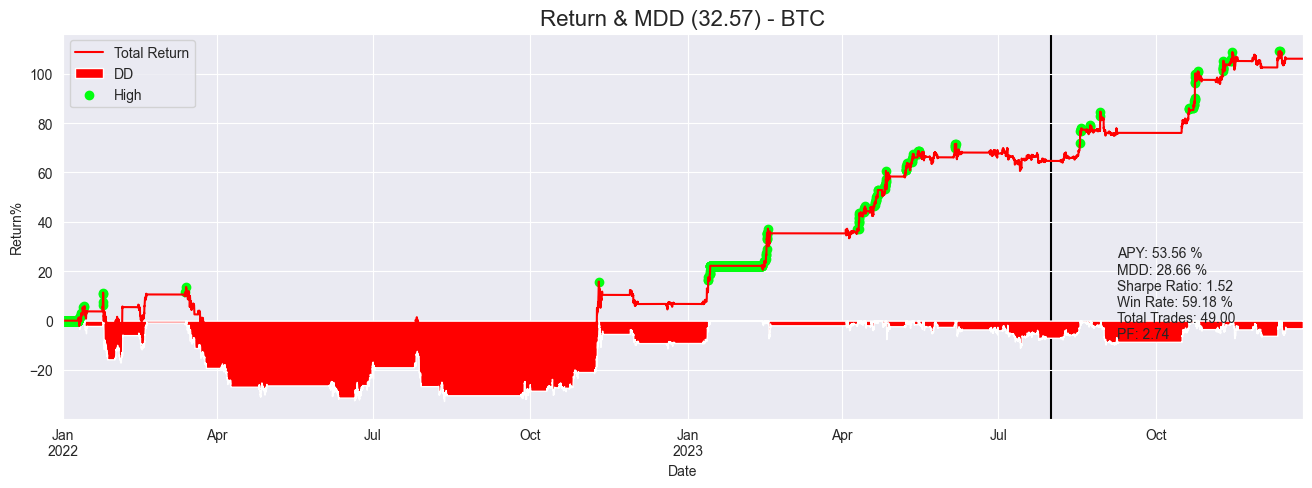

In [15]:
start = '2022-01-01'
sep = ''
end = ''
# new version
# 到禮拜五:{'vol_threshold': 0.05, 'ret_threshold': 0.3}
side = 'both'
params = {'vol_threshold': 2.5, 'ret_threshold': 0.39999999999999997, 'stop_loss': 8, 'mutiplier': 3}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-08-01'])

In [13]:
start= '2022-01-01'
end ='2023-06-01'

params={
   'vol_threshold': [2.5, 3, 1],
   'ret_threshold' : [0.3, 0.5, 0.05],
   'stop_loss': [8,11,1],
    'mutiplier':[2,8,1]
#   'sl' : [100, 101, 20],
#   'window': [12,96,4]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

======================= BTC LONG Optimize Test =======================
Optimization trails: 72


100%|██████████| 72/72 [01:45<00:00,  1.47s/it]


Optimization time: 105.84 sec
---------- BTC LONG ----------
{'vol_threshold': 2.5, 'ret_threshold': 0.39999999999999997, 'stop_loss': 8, 'mutiplier': 3}
APY: 42.75 %
MDD: 13.04 %
MDD Duration 205 days 09:00:00
worst trade: -8.06 %
2022-04-03 00:00:00 ~ 2022-04-08 18:00:00
avg holding days: 5.19 days
--------------------------------------------
PF: 5.99
Sharpe Ratio: 1.87
Calmar Ratio: 3.04
Sortino Ratio: 2.83
Omega Ratio: 1.19
--------------------------------------------
Expectancy : 4.32 %
Total Time Exposure : 14.06 %
Total Trades: 14
Win Rate: 78.57 %
--------------------------------------------
PF * Win Rate: 4.710


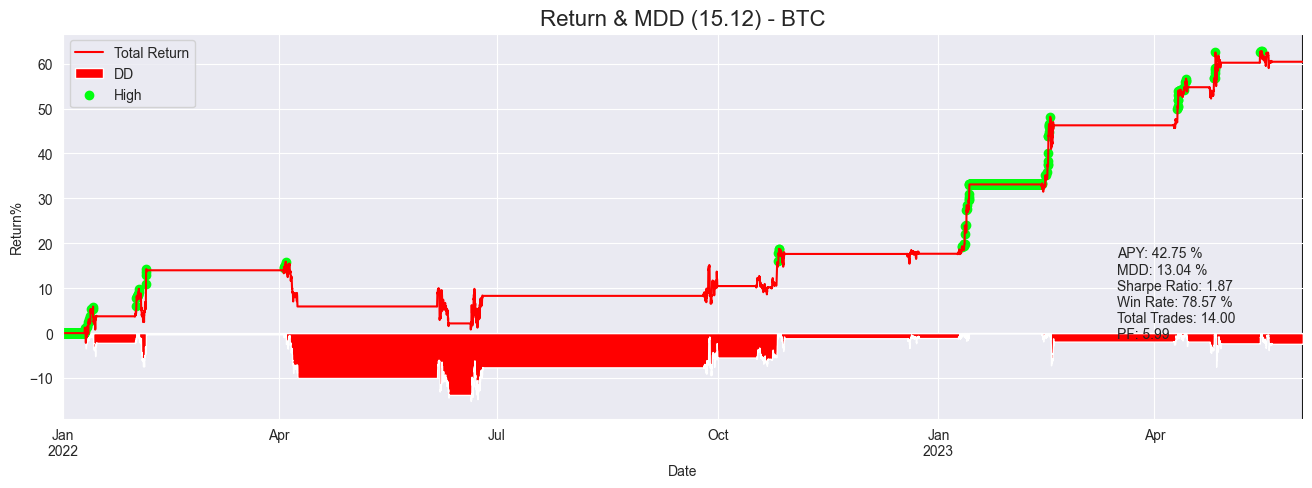

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     13.99 | 1399.04 |     0    |     inf    |  100    |          2 |
| 2022-06    |     -5.7  |  613.44 | -1183.18 |       0.52 |   33.33 |          3 |
| 2022-09    |      2.19 |  218.71 |     0    |     inf    |  100    |          1 |
| 2022-12    |      7.19 |  746.12 |   -26.81 |      27.83 |   66.67 |          3 |
| 2023-03    |     28.6  | 2860.03 |     0    |     inf    |  100    |          2 |
| 2023-06    |     14.16 | 1415.72 |     0    |     inf    |  100    |          3 |
+------------+-----------+---------+----------+------------+---------+------------+


In [14]:
all_params = multi_test.multi_params(symbol_list,sample_sets,direction='long')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)